# Plots for ML4O2 products
- enter the version to plot
- plots RMSE and Correlation from test data
- plots annual and seasonal climatology, and offsets from WOA18

In [99]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath
import cartopy.crs as ccrs
import joblib

In [103]:
versions = ['1.2.1.1.1.1',
            '2.2.1.1.1.1',
            '1.2.1.1.2.2',
            '2.2.1.1.2.2']
#versions = ['1.2.5.1.2.2',
#           '2.2.5.1.2.2']
Nd = np.size(versions)

In [104]:
sels=np.empty((Nd,6),dtype='<U8')
for n,ver in enumerate(versions):
    selection = versions[n].split('.')
    print('-----------')
    print('version = '+versions[n])
    basin = ['Atlantic','Pacific','Indian','Southern','Arctic']
    #
    if selection[0] == '1':
        print('Random Forst algorithm will be used.')
        alg = 'RF'
    elif selection[0] == '2':
        print('Neural Network algorithm will be used.')
        alg = 'NN'
    else:
        print('error - incorrect algorithm type')
    #
    if selection[1] == '1':
        print('Ship-based O2 data will be used. Year_end = 2011')
        endyear=2011
    elif selection[1] == '2':
        print('Ship-based and Argo-O2 data will be used. Year_end = 2021')
        endyear=2021
    else:
        print('error - incorrect input data type')
    #
    if selection[2] == '1':
        print(basin[int(selection[2])-1]+' Ocean will be mapped')
    elif selection[2] == '2':
        print(basin[int(selection[2])-1]+' Ocean will be mapped')
    elif selection[2] == '3':
        print(basin[int(selection[2])-1]+' Ocean will be mapped')
    elif selection[2] == '4':
        print(basin[int(selection[2])-1]+' Ocean will be mapped')
    elif selection[2] == '5':
        print(basin[int(selection[2])-1]+' Ocean will be mapped')
    else:
        print('error - incorrect O2 data type')
    #
    if selection[3] == '1':
        print('EN4 dataset will be used for T/S input. ')
    else:
        print('error - incorrect T/S data type')
    #
    if selection[4] == '1':
        print('Predictor variables include T, S, lon, lat, depth (pressure), year, month')
    elif selection[4] == '2':
        print('Predictor variables include T, S, lon, lat, depth (pressure), year, cos(month), sin(month)')
    else:
        print('error - incorrect predictor variable type')
    #
    if selection[5] == '1':
        print('Hyperparameter set is optimized via K-fold CV')
    elif selection[5] == '2':
        print('A pre-set hyperparameter set is used')
    else:
        print('error - incorrect hyperparameter type')

-----------
version = 1.2.1.1.1.1
Random Forst algorithm will be used.
Ship-based and Argo-O2 data will be used. Year_end = 2021
Atlantic Ocean will be mapped
EN4 dataset will be used for T/S input. 
Predictor variables include T, S, lon, lat, depth (pressure), year, month
Hyperparameter set is optimized via K-fold CV
-----------
version = 2.2.1.1.1.1
Neural Network algorithm will be used.
Ship-based and Argo-O2 data will be used. Year_end = 2021
Atlantic Ocean will be mapped
EN4 dataset will be used for T/S input. 
Predictor variables include T, S, lon, lat, depth (pressure), year, month
Hyperparameter set is optimized via K-fold CV
-----------
version = 1.2.1.1.2.2
Random Forst algorithm will be used.
Ship-based and Argo-O2 data will be used. Year_end = 2021
Atlantic Ocean will be mapped
EN4 dataset will be used for T/S input. 
Predictor variables include T, S, lon, lat, depth (pressure), year, cos(month), sin(month)
A pre-set hyperparameter set is used
-----------
version = 2.2.1.1.

### RMSE and R value from test data (20%)

R2=[0.97503204 0.93750587 0.97553846 0.93679241]
RMSE=[ 9.57797671 15.15617148  9.48028624 15.37858833]


/glade/derecho/scratch/ito/tmp/ipykernel_65818/4221323384.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(versions,rotation=30)
/glade/derecho/scratch/ito/tmp/ipykernel_65818/4221323384.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(versions,rotation=30)


Text(0, 0.5, 'R2')

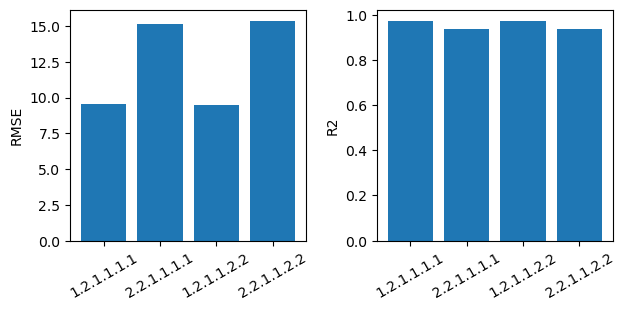

In [105]:
R2=np.zeros(Nd)
RMSE=np.zeros(Nd)
#
for n in range(Nd):
    test = np.load(f'/glade/campaign/univ/ugit0034/ML4O2_results/o2test_pred_v{versions[n]}.npz')
    o2est = test['est']
    o2test= test['test']
    #
    tmp=np.corrcoef(o2est,o2test)
    R2[n] = tmp[0,1]**2
    #
    RMSE[n] = np.sqrt(np.mean((o2est-o2test)**2))
#
print('R2='+str(R2))
print('RMSE='+str(RMSE))
#
fig=plt.figure(figsize=(7,3))
ax=fig.subplots(1,2)
plt.subplots_adjust(wspace=.3)
ax[0].bar(versions,RMSE)
ax[0].set_xticklabels(versions,rotation=30)
ax[0].set_ylabel('RMSE')
ax[1].bar(versions,R2)
ax[1].set_xticklabels(versions,rotation=30)
ax[1].set_ylabel('R2')

### Read in World Ocean Atlas 2018 climatology for comparison

In [106]:
dc=xr.open_mfdataset('/glade/campaign/univ/ugit0034/woa18/monthly/woa18_all_o*',decode_times=False)

### Compare mean vertical profile against WOA

In [107]:
ds=xr.open_dataset(f'/glade/campaign/univ/ugit0034/ML4O2_results/O2map_v{versions[n]}.nc')
z=ds.depth.to_numpy()
o2woa = dc.o_an.interp(depth=z).sel(depth=slice(0,1000)).mean('time').to_numpy()

In [108]:
do2z=np.zeros((Nd,20))
for n in range(Nd):
    ds=xr.open_dataset(f'/glade/campaign/univ/ugit0034/ML4O2_results/O2map_v{versions[n]}.nc')
    o2est = ds.o2est.mean('time').to_numpy() 
    do2=o2est - o2woa
    for k in range(20):
        do2z[n,k] = np.nanmean(do2[k,:,:].flatten())

Text(0, 0.5, 'depth, m')

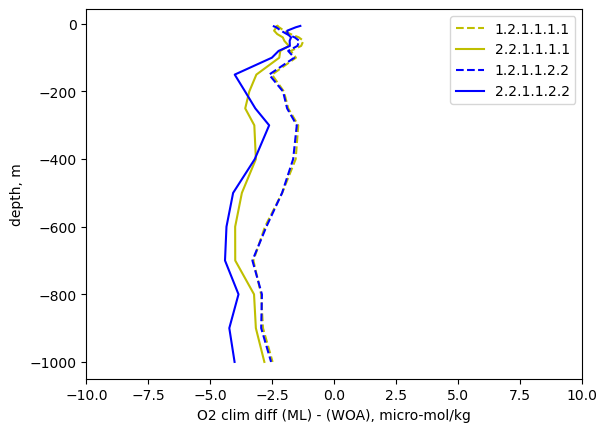

In [109]:
ls=['--','-','--','-']
col=['y','y','b','b']
for n in range(Nd):
    plt.plot(do2z[n,:],-z,ls[n],color=col[n],label=versions[n])
plt.xlim(-10,10)
plt.legend()
plt.xlabel('O2 clim diff (ML) - (WOA), micro-mol/kg')
plt.ylabel('depth, m')

### Calculate time series

In [125]:
# inventory trend
y = ds.lat
x = ds.lon
z = ds.depth
Nz=np.size(z)
z0=np.zeros(Nz+1)
z0[1:]=z
dz=np.diff(z0)
#
xx,yy=np.meshgrid(x,y)
R=6.37e6
darea=np.cos(yy*np.pi/180)*(R*np.pi/180)**2
#darea[(yy>-10)|(yy<=-40)]=0
dvo=np.zeros((Nz,180,360))
# volume element in 3D
for n in range(Nz):
    dvo[n,:,:]=darea*dz[n]
#
weight = dvo
dweight = xr.DataArray(data=weight,dims=['depth','lat','lon'],
                 coords={'depth':z,'lat':y,'lon':x})
#
Nt=np.size(ds.time.to_numpy())
o2inva = np.zeros((Nd,672))*np.nan
for n in range(Nd):
    ds=xr.open_dataset(f'/glade/campaign/univ/ugit0034/ML4O2_results/O2map_v{versions[n]}.nc')
    Nt=ds.dims['time']
    o2invg = ds.o2est.weighted(dweight).sum('lon').sum('lat').sum('depth')*1e-6*1025 # convert to mol
    o2ag = o2invg.groupby('time.month') - o2invg.groupby('time.month').mean('time') # calculate O2 inventory anomaly
    o2inva[n,:Nt]=o2ag.to_numpy()

Text(0, 0.5, 'O2 inventory anomaly, molO2')

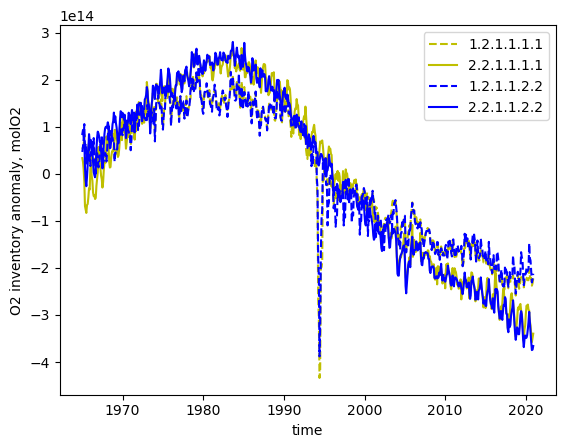

In [126]:
time=ds.time.to_numpy()
for n in range(Nd):
    plt.plot(time,o2inva[n,:],ls[n],color=col[n],label=versions[n])
plt.legend()
plt.xlabel('time')
plt.ylabel('O2 inventory anomaly, molO2')

In [127]:
# multi-decadal change pattern
diro='/glade/campaign/univ/ugit0034/ML4O2_results/O2map_v'
do2 = np.zeros((4,ds.dims['depth'],ds.dims['lat'],ds.dims['lon']))
#
for n,v in enumerate(versions):
    ds=xr.open_dataset(diro+v+'.nc')
    # contrast 70s vs 2000s
    delo2 = ds.o2est.sel(time=slice('2000-01','2010-01')).mean('time') \
            - ds.o2est.sel(time=slice('1970-01','1980-01')).mean('time')
    do2[n,:,:,:]=delo2.to_numpy()

depth=50.0


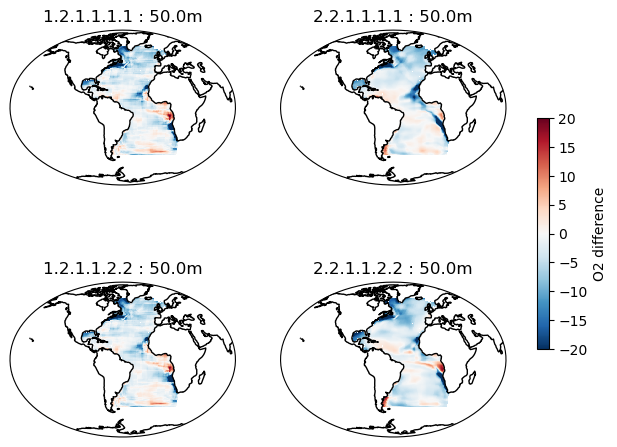

In [128]:
# select depth level
K = 5
z = ds.depth[K].to_numpy()
print('depth='+str(z))
#
fig=plt.figure(figsize=(8,6))
if selection[2]=='5':
    ax=fig.subplots(1,2,subplot_kw={'projection': 
        ccrs.Stereographic(central_longitude=0,central_latitude=90)})
    ext=[-180,180,90,50]
elif selection[2]=='4':
    ax=fig.subplots(2,2,subplot_kw={'projection': 
        ccrs.Stereographic(central_longitude=0,central_latitude=-90)})
    ext=[-180,180,-90,-50]
elif selection[2]=='1':
    ax=fig.subplots(2,2,subplot_kw={'projection': 
        ccrs.Robinson(central_longitude=-10)})
    ext=[-180,180,-90,90]
elif selection[2]=='2':
    ax=fig.subplots(2,2,subplot_kw={'projection': 
        ccrs.Robinson(central_longitude=-150)})
    ext=[-180,180,-90,90]
elif selection[2]=='3':
    ax=fig.subplots(2,2,subplot_kw={'projection': 
        ccrs.Robinson(central_longitude=60)})
    ext=[-180,180,-90,90]
lon=ds.lon
lat=ds.lat
ax1=ax.flatten()
for n in range(Nd):
    ax1[n].set_extent(ext, ccrs.PlateCarree())
    im=ax1[n].pcolormesh(lon,lat,do2[n,K,:,:],cmap='RdBu_r',vmin=-20,vmax=20,transform=ccrs.PlateCarree())
    ax1[n].coastlines()
    ax1[n].set_title(versions[n]+' : '+str(z)+'m')
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1[n].set_boundary(circle, transform=ax1[n].transAxes)
plt.colorbar(im,ax=ax1[:],location='right',shrink=.5,label='O2 difference')
#plt.savefig('difference_plot.pdf',bbox_inches='tight')